# Installation et import des packages

In [ ]:
install.packages("np")
install.packages("KernSmooth")
install.packages("ibr")
library(ibr)
library(KernSmooth)
library(np)

# Import des données

In [2]:
df=read.table("salaire.txt",header=T)

In [3]:
dim(df)

[1] 300   2

In [4]:
summary(df)

      age           salaire      
 Min.   :18.00   Min.   : 23.95  
 1st Qu.:34.00   1st Qu.: 83.71  
 Median :43.00   Median :105.93  
 Mean   :42.93   Mean   :109.75  
 3rd Qu.:51.00   3rd Qu.:127.12  
 Max.   :80.00   Max.   :318.34  

In [5]:
attach(df)

# Visualisations 

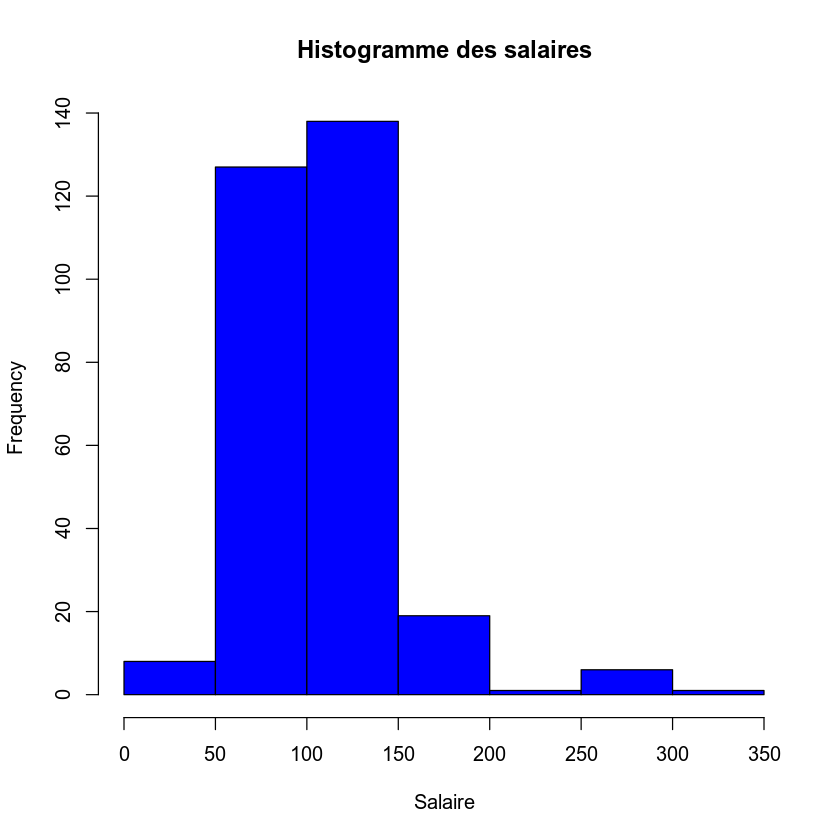

In [6]:
hist(salaire, main="Histogramme des salaires", xlab="Salaire", col="blue")

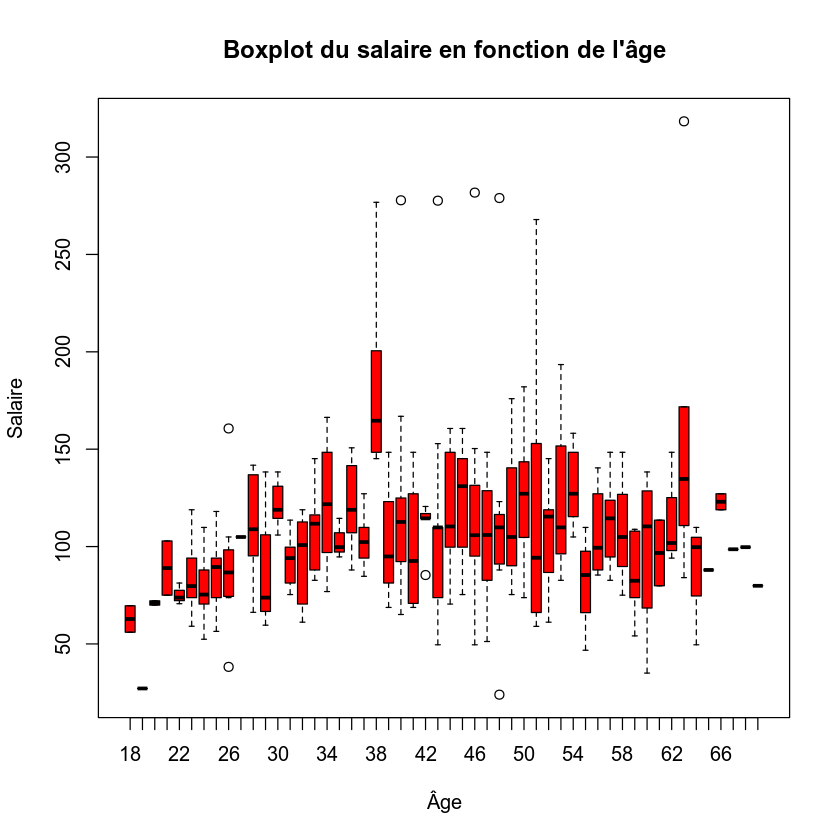

In [7]:
boxplot(salaire ~ age, main="Boxplot du salaire en fonction de l'âge", xlab="Âge", ylab="Salaire", col="red")

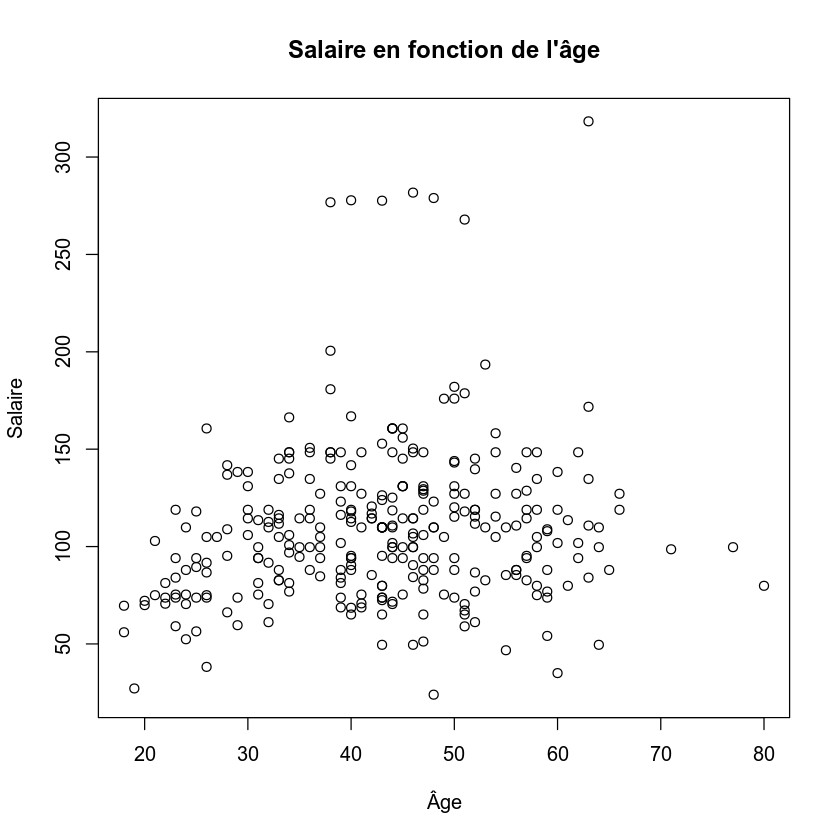

In [8]:
plot(age, salaire, main="Salaire en fonction de l'âge", xlab="Âge", ylab="Salaire")

# Régression linéaire

## Méthode 1 :
En utilisant le module lm

In [9]:
reg=lm(salaire~age,data=df)
coef = reg$coefficients
coef

(Intercept)         age 
 87.7389804   0.5127655

In [10]:
summary(reg)


Call:
lm(formula = salaire ~ age, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-88.399 -25.779  -5.266  15.956 198.299 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  87.7390     8.8759   9.885   <2e-16 ***
age           0.5128     0.1996   2.570   0.0107 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 40.25 on 298 degrees of freedom
Multiple R-squared:  0.02168,	Adjusted R-squared:  0.01839 
F-statistic: 6.603 on 1 and 298 DF,  p-value: 0.01067


## Méthode 2 :

En utilisant les formules dejà calculés :
$\hat{\beta}1 = \frac{\sum_{i=1}^N (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^N (X_i - \bar{X})^2} $ 
$\hat{\beta}_0 = \bar{Y} - \hat{\beta}_1 \bar{X}$

In [28]:
mean_age <- mean(age)
mean_salaire <- mean(salaire)
beta_1 <- sum((age - mean_age) * (salaire - mean_salaire)) / sum((age - mean_age)^2)
beta_0 <- mean_salaire - beta_1 * mean_age

# Afficher les coefficients avec le format souhaité
cat("(Intercept)  : ", beta_0, "\t age : ", beta_1, "\n")

(Intercept)  :  87.73898 	 age :  0.5127655 


# Ajustement

## méthode 1 :

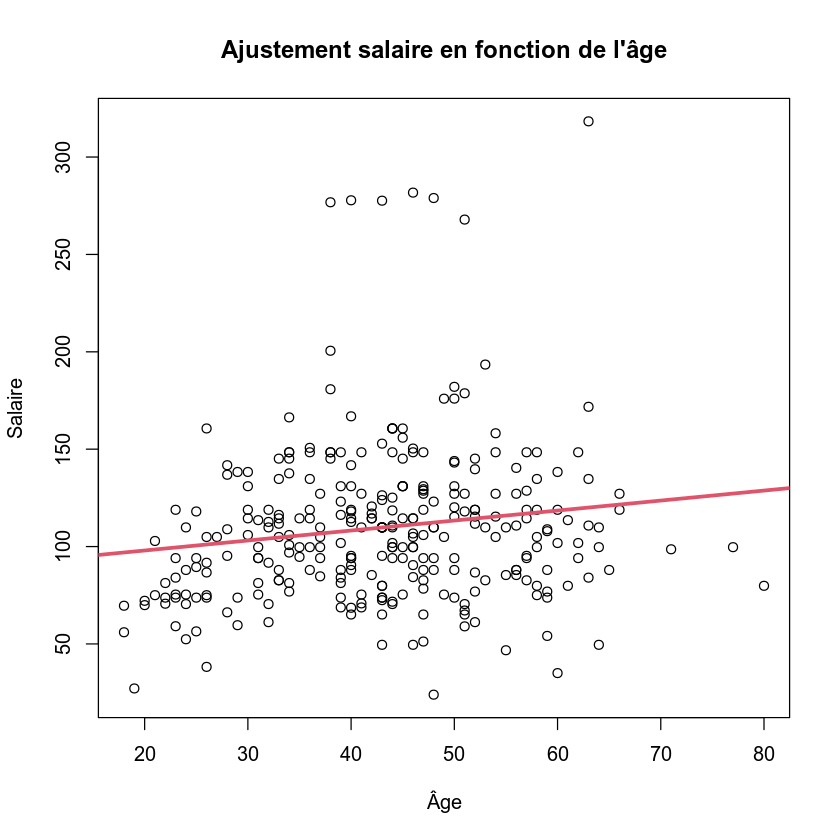

In [11]:
plot(age, salaire, main="Ajustement salaire en fonction de l'âge", xlab="Âge", ylab="Salaire")
abline(reg,col=2,lwd=3)

## Méthode 2 :

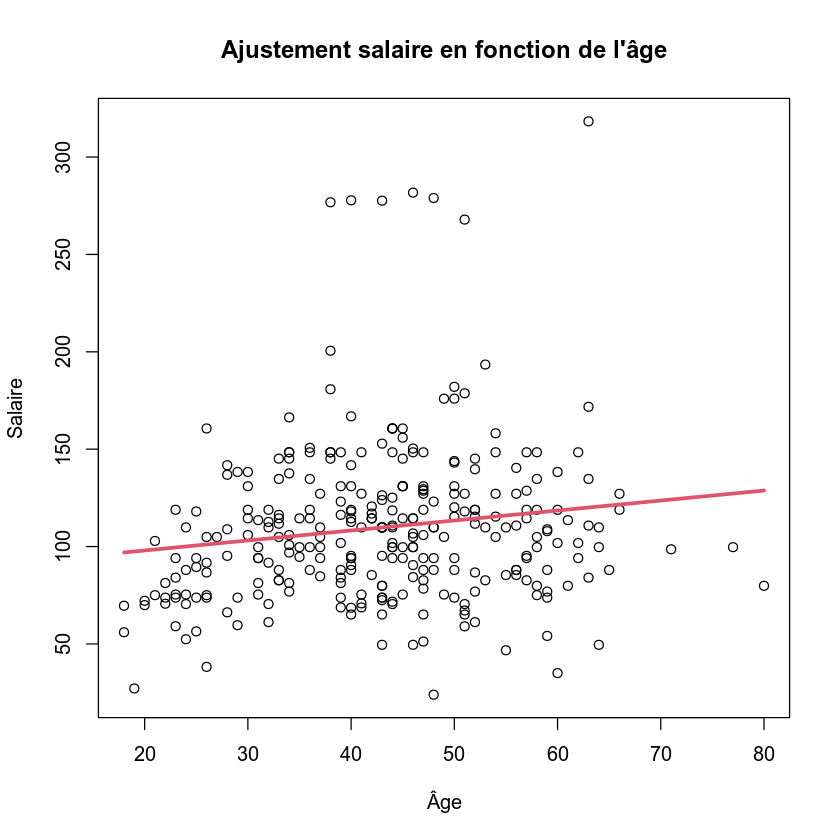

In [12]:
plot(age, salaire, main="Ajustement salaire en fonction de l'âge", xlab="Âge", ylab="Salaire")
curve(drop(cbind(1,x) %*% coef(reg)),add=T,col=2, lwd = 3)

# Ajout terme quadratique

### Méthode 1 :

In [13]:
reg2=lm(salaire~age+I(age^2),data=df)
coef = reg2$coefficients
coef

(Intercept)         age    I(age^2) 
 3.46872457  4.69351734 -0.04811919

In [14]:
summary(reg2)


Call:
lm(formula = salaire ~ age + I(age^2), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-93.938 -23.746  -3.542  13.815 210.167 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.46872   24.23648   0.143 0.886292    
age          4.69352    1.13933   4.120 4.93e-05 ***
I(age^2)    -0.04812    0.01292  -3.725 0.000234 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.41 on 297 degrees of freedom
Multiple R-squared:  0.06534,	Adjusted R-squared:  0.05904 
F-statistic: 10.38 on 2 and 297 DF,  p-value: 4.389e-05


## Méthode 2 :
En utilisant la formule $\beta = (\mathbf{X}^T \mathbf{X})^{-1} (\mathbf{X}^T \mathbf{Y})$

In [15]:
X <- cbind(1, age, age^2)
Y <- as.matrix(salaire)
beta <- solve(t(X) %*% X) %*% (t(X) %*% Y)

# pour afficher les resultats comme lm
names(beta) <- c("(Intercept)", "age", "I(age^2)")
cat(names(beta)[1], " : ", beta[1], "\t", names(beta)[2], " : ", beta[2], "\t", names(beta)[3], " : ", beta[3], "\n")


(Intercept)  :  3.468725 	 age  :  4.693517 	 I(age^2)  :  -0.04811919 


<strong>En effet le resultat corresspond au résultat trouvé par lm </strong>

# Ajustement

## méthode 1 :

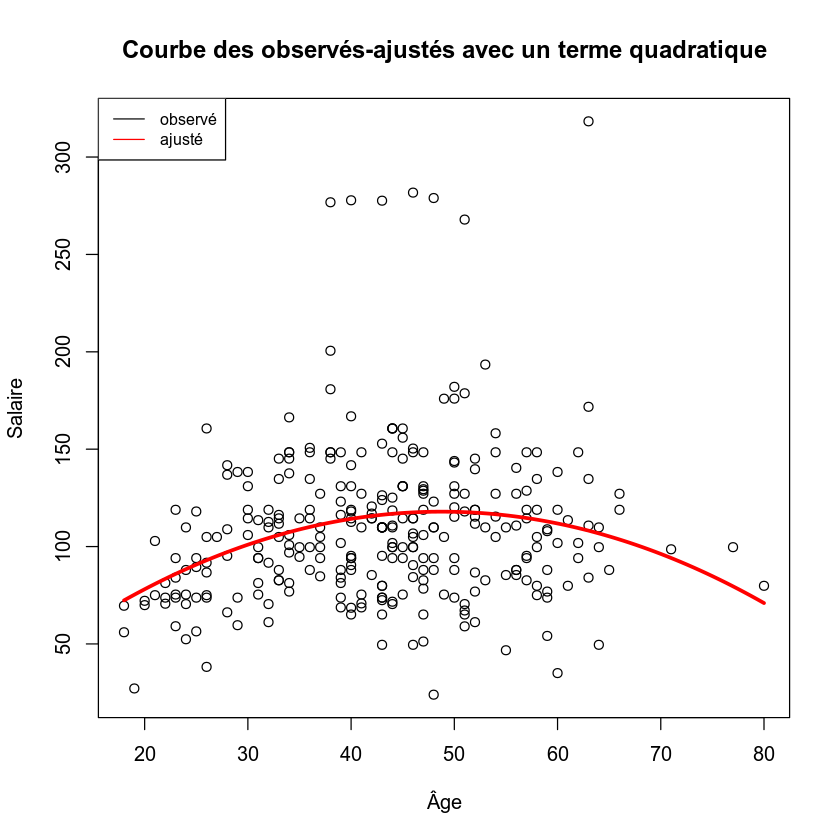

In [16]:
plot(age, salaire, main="Courbe des observés-ajustés avec un terme quadratique", xlab="Âge", ylab="Salaire")
curve(drop(cbind(1, x, x^2) %*% coef(reg2)),add=T,col="red", lwd = 3)
legend("topleft", legend=c("observé","ajusté"),col=c("black","red"),lty=1, cex=0.8)

## Méthode 2 :

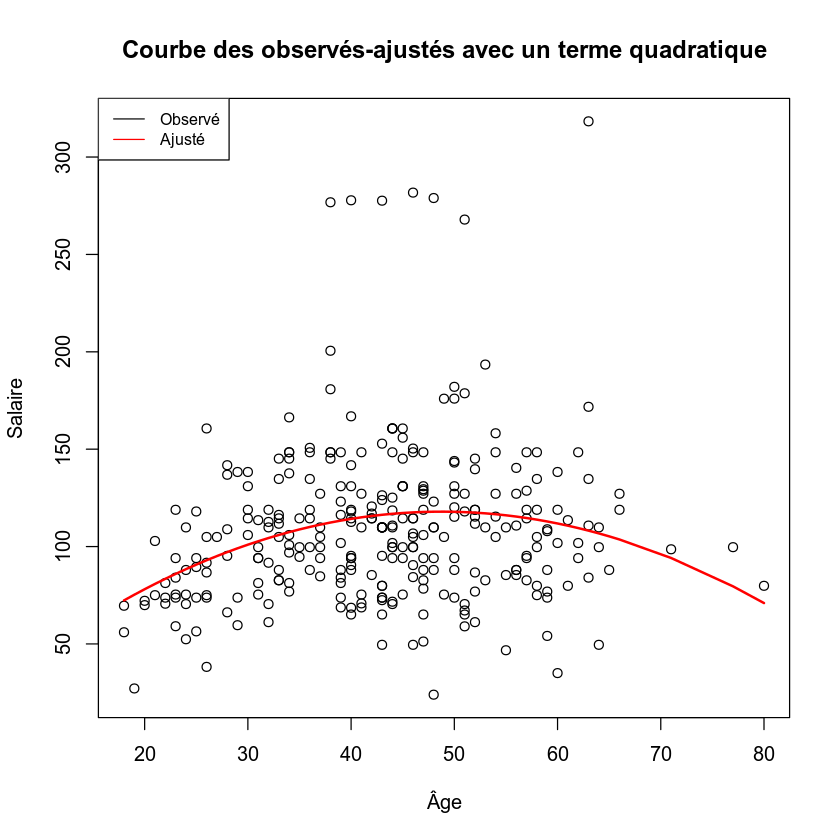

In [17]:
# Trier les données par âge
sorted_data <- data.frame(age, salaire)
sorted_data <- sorted_data[order(sorted_data$age),]

# Calculer les valeurs ajustées pour les données triées
salaire_ajuste_quadratique <- predict(reg2, newdata = sorted_data)
#ou simplement salaire_ajuste_quadratique <- drop(cbind(1,sorted_data, sorted_data^2) %*% coef(reg2))

# Tracer la courbe des observés-ajustés
plot(sorted_data$age, sorted_data$salaire, xlab = "Âge", ylab = "Salaire", main = "Courbe des observés-ajustés avec un terme quadratique")
lines(sorted_data$age, salaire_ajuste_quadratique, col = "red", lwd = 2)
legend("topleft", legend = c("Observé", "Ajusté"), col = c("black", "red"), lty = 1, cex = 0.8)

# Estimation par Nadaraya-Watson

## Test avec plusieurs valeurs de l'hyperparamètre h (Bandwith)

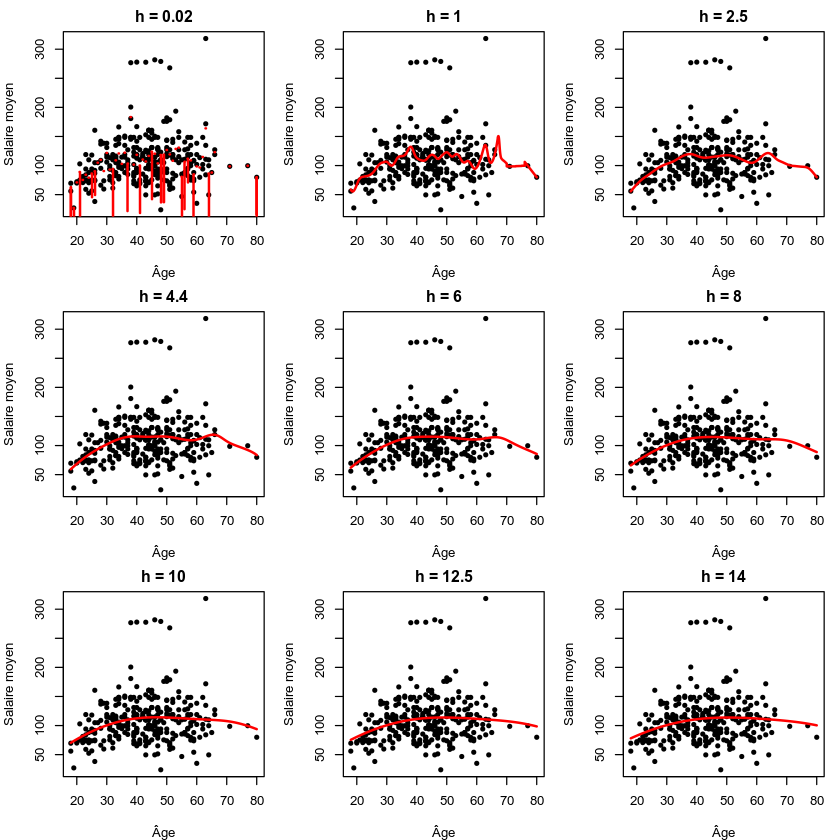

In [18]:
# Liste des valeurs de h à tester
h_values <- c(0.02, 1, 2.5, 4.4, 6, 8, 10, 12.5, 14)

nrow_subplots <- 3
ncol_subplots <- 3

par(mfrow = c(nrow_subplots, ncol_subplots), mar = c(4, 4, 2, 1))

for (h in h_values) {
  fit <- locpoly(x = age, y = salaire, kernel = "epanechnikov", bandwidth = h, gridsize = 7000)
  
  plot(df$age, df$salaire, pch = 20, xlab = "Âge", ylab = "Salaire moyen", main = paste("h =", h))
  lines(fit$x, fit$y, col = "red", lwd = 2)
}


## Trouver le bon h avec une CVLOO

In [19]:
# Définir une séquence de valeurs de h (bandwidth) à tester
H <- seq(0.1, 30, by = 0.1)

# Créer une matrice vide pour stocker les erreurs
error <- matrix(NA, nrow = length(age), ncol = length(H))

# Boucle pour chaque valeur de h (bandwidth)
for (k in 1:length(H)) {
  
  # Boucle pour chaque point de données
  for (i in 1:length(age)) {
    
    # Estimation de Nadaraya-Watson avec un noyau epanechnikov
    res <- npregress(age[-i], salaire[-i],
                     bandwidth = H[k],kernel="e",
                     control.par = list(degree = 0))
    
    # Calcul de l'erreur quadratique pour le point laissé de côté
    error[i, k] <- (salaire[i] - predict(res, age[i]))^2
  }
}

# Calculer l'erreur quadratique moyenne (MSE) pour chaque valeur de h
E <- apply(error, 2, mean)

# Trouver la meilleure valeur de h (bandwidth) en minimisant l'erreur quadratique moyenne
best_h <- H[which.min(E)]

# Afficher le meilleur h
cat("Le meilleur h (bandwidth) pour l'estimateur de Nadaraya-Watson est :", best_h)


Le meilleur h (bandwidth) pour l'estimateur de Nadaraya-Watson est : 8.8

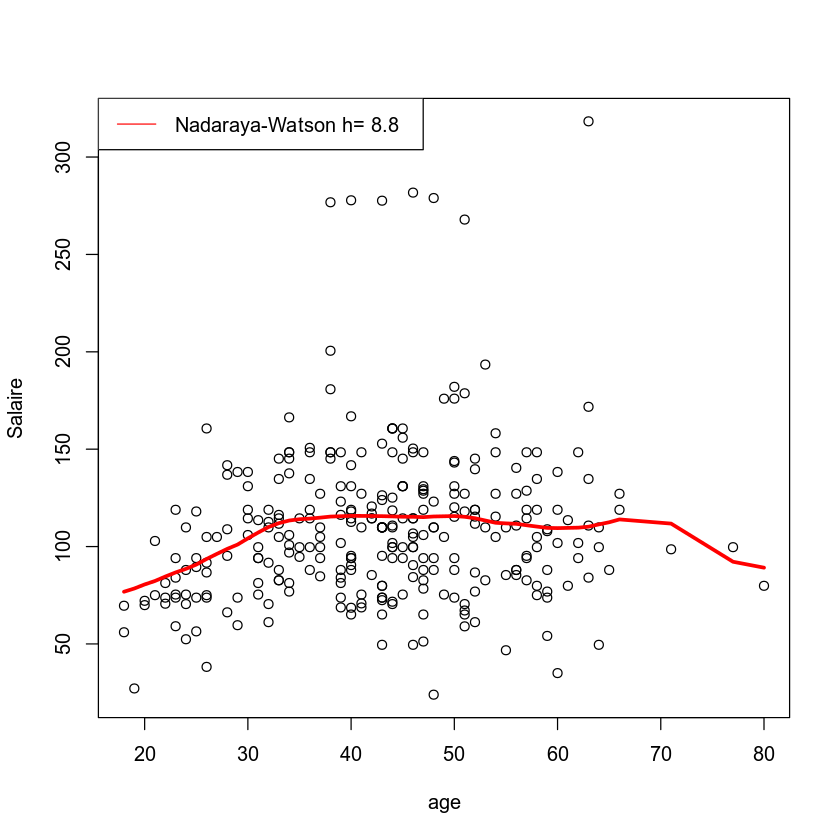

In [20]:
sorted_data <- data.frame(age, salaire)
sorted_data <- sorted_data[order(sorted_data$age),]
Y = npregress(sorted_data$age,sorted_data$salaire,bandwidth=best_h,kernel="e")$fitted
plot(sorted_data$age,sorted_data$salaire,xlab = "age", ylab = "Salaire")
lines(sorted_data$age,Y,col="red",lwd=3)
legend("topleft",legend=(paste("Nadaraya-Watson h=",best_h)),col="red",lwd=1)

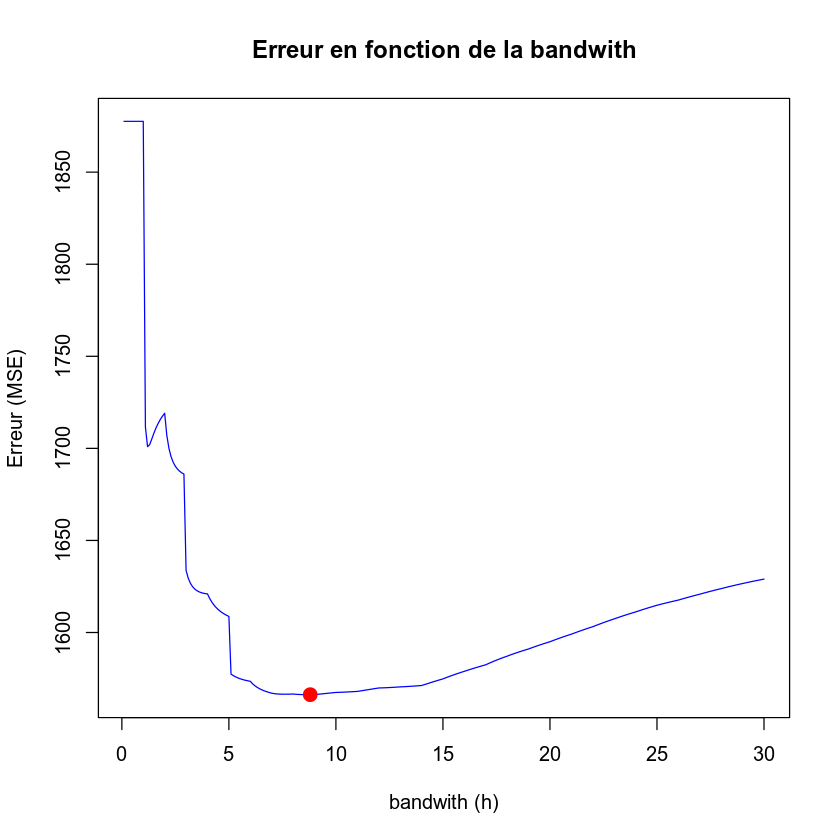

In [21]:
plot(H, E, type = "l", col = "blue",
     xlab = "bandwith (h)",
     ylab = "Erreur (MSE)",
     main = "Erreur en fonction de la bandwith")

# Ajouter un point rouge pour indiquer la meilleure valeur de h
points(best_h, min(E), col = "red", pch = 19, cex = 1.5)

In [22]:
n=length(salaire)
error_lin=numeric(n)

for (i in 1:n)
{
  res= lm(salaire~age,data=df[-i,])
  error_lin[i]=(salaire[i]-predict(res,newdata=df[i,]))^2
}
cat("erreur CV pour la regression linéaire simple :", mean(error_lin))

erreur CV pour la regression linéaire simple : 1630.229

In [23]:
error_quad=numeric(n)

for (i in 1:n)
{
  res= lm(salaire~age+I(age^2),data=df[-i,])
  error_quad[i]=(salaire[i]-predict(res,newdata=df[i,]))^2
}
cat("erreur CV pour la regression linéaire avec terme quadratique :", mean(error_quad))

erreur CV pour la regression linéaire avec terme quadratique : 1563.754

In [25]:
sorted_data <- data.frame(age, salaire)
sorted_data <- sorted_data[order(sorted_data$age),]
error_nw = numeric(n)
for (i in 1:n) {
  pred <- predict(npregress(sorted_data$age, sorted_data$salaire, bandwidth = best_h , kernel = "e"), newdata = data.frame(age = sorted_data$age[i]))
  error_nw[i] <- (sorted_data$salaire[i] - pred)^2
}
cat("erreur CV pour la regression par estimation de nadaraya-watson' :", mean(error_nw))


erreur CV pour la regression par estimation de nadaraya-watson' : 1522.401

### On remarque que l'erreur par cross validation la plus petite est celle donné par la regression par estimation de nadaraya-watson